**Реализация оптического потока**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**Фуекция предназначена для вычислений градиентов изображения**

In [ ]:
def compute_gradients(I1, I2):
    Ix = cv2.Sobel(I1, cv2.CV_64F, 1, 0, ksize=5)
    Iy = cv2.Sobel(I1, cv2.CV_64F, 0, 1, ksize=5)
    It = I2 - I1
    return Ix, Iy, It

**Алгоритм Лукаса-Канаде**

In [ ]:
def lucas_kanade_optical_flow(I1, I2, window_size=5):
    Ix, Iy, It = compute_gradients(I1, I2)
    cv2_imshow(Ix)
    cv2_imshow(Iy)
    cv2_imshow(It)

    half_window = window_size // 2
    h, w = I1.shape
    flow = np.zeros((h, w, 2))  # Хранит векторы потока (u, v)

    for y in range(half_window, h - half_window):
        for x in range(half_window, w - half_window):
            Ix_window = Ix[y - half_window:y + half_window + 1, x - half_window:x + half_window + 1].flatten()
            Iy_window = Iy[y - half_window:y + half_window + 1, x - half_window:x + half_window + 1].flatten()
            It_window = It[y - half_window:y + half_window + 1, x - half_window:x + half_window + 1].flatten()

            M = np.vstack((Ix_window, Iy_window)).T
            b = -It_window

            # Решаем систему уравнений M * [u, v] = b
            if np.linalg.matrix_rank(M) == 2:
                nu = np.linalg.lstsq(M, b, rcond=None)[0]  # Находим [u, v]
                flow[y, x] = nu
    print(flow.shape)

    return flow

**Задаем данные**

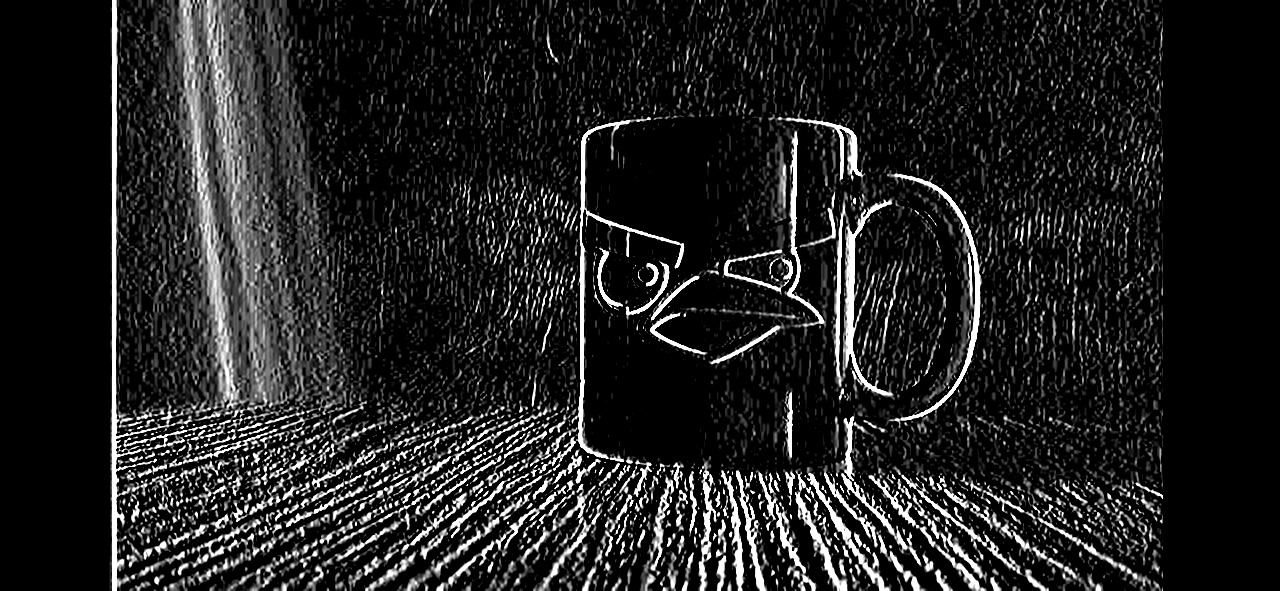

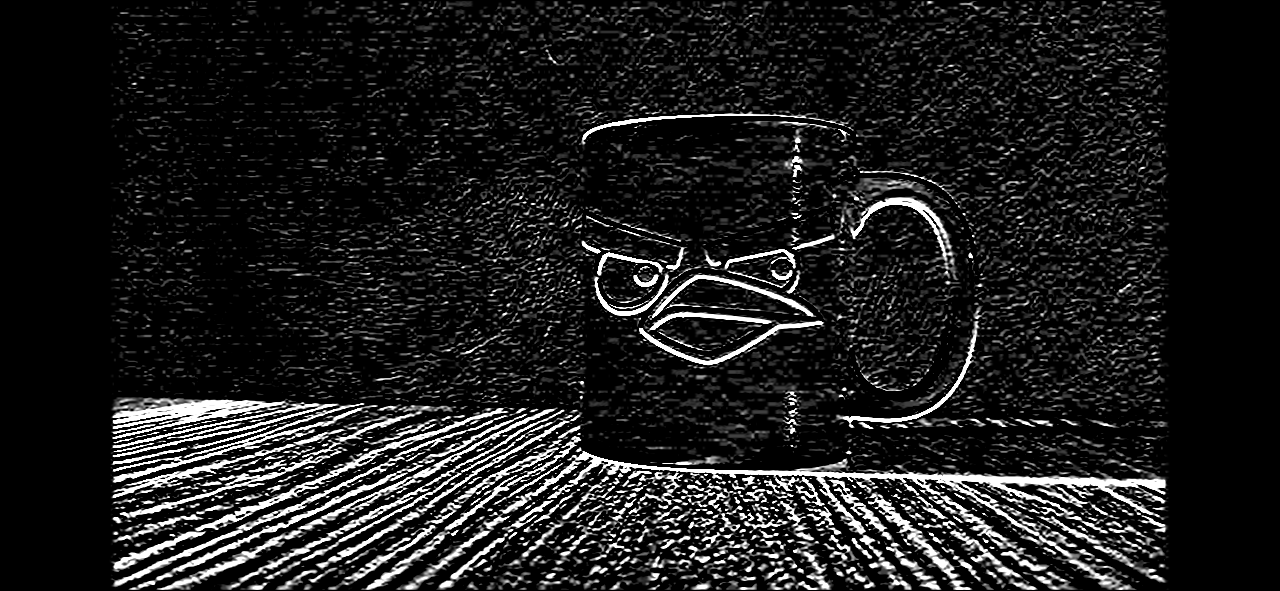

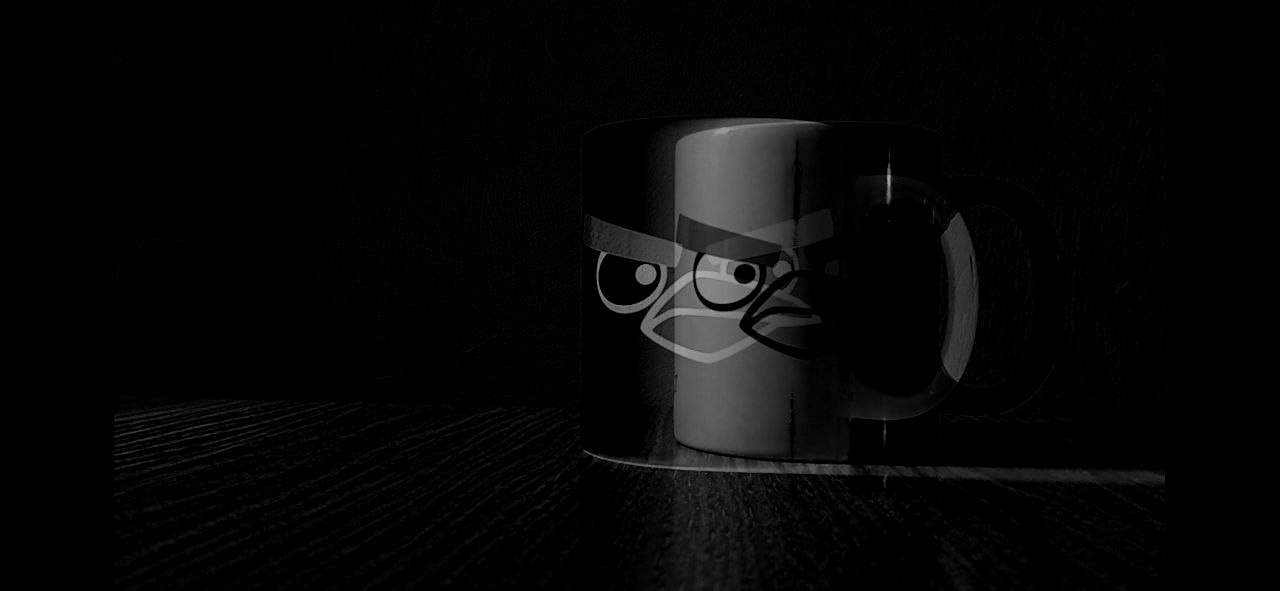

(591, 1280, 2)


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/CV_lab4/фото_5.jpg')
img2 = cv2.imread('/content/drive/MyDrive/CV_lab4/фото_6.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

flow = lucas_kanade_optical_flow(gray1.astype(np.float32), gray2.astype(np.float32))

min_length = 12
max_length = 15

**Отрисовка векторов на изображении**

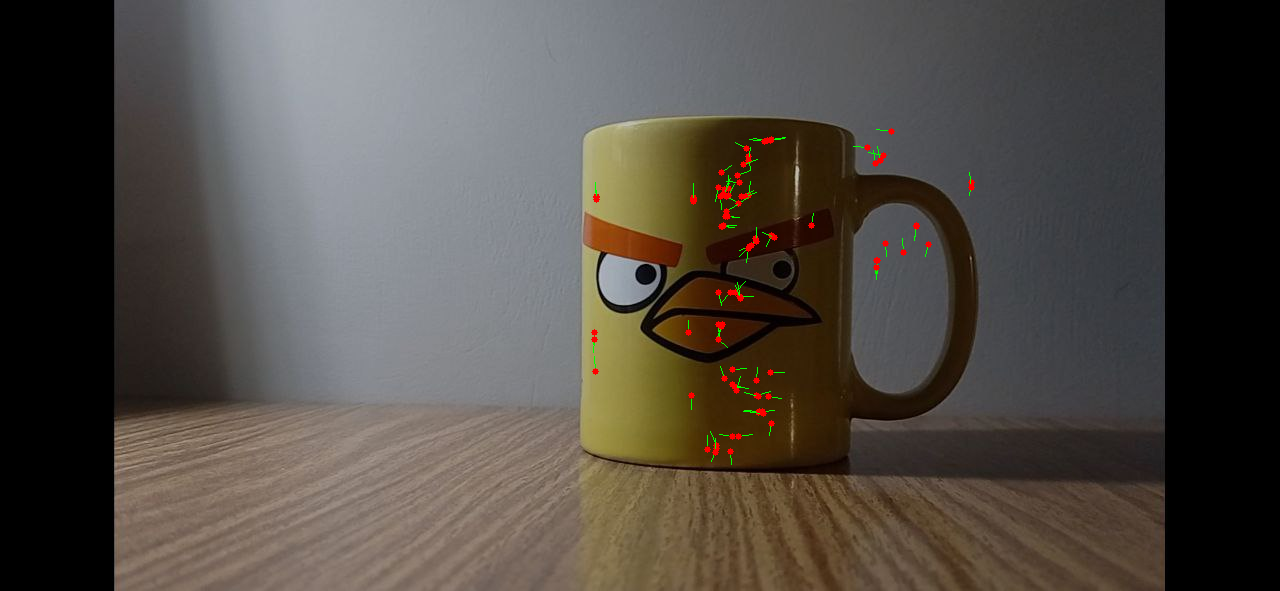

In [ ]:
for y in range(flow.shape[0]):
    for x in range(flow.shape[1]):
        u, v = flow[y, x]
        length = np.linalg.norm([u, v])
        if min_length < length < max_length:
            img1 = cv2.line(img1, (x, y), (int(x + u), int(y + v)), (0, 255, 0), 1)
            img1 = cv2.circle(img1, (x, y), 3, (0, 0, 255), -1)

cv2_imshow(img1)